In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('employees.csv')
df.head(10)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [64]:
# Delete all the rows having null values in First name column
df['First Name'].dropna(inplace=True)
df['First Name']


0      Douglas
1       Thomas
2        Maria
3        Jerry
4        Larry
        ...   
995      Henry
996    Phillip
997    Russell
998      Larry
999     Albert
Name: First Name, Length: 933, dtype: object

In [58]:
#ii) After the above process if any null values are present in Gender column follow the function given
#below
#If index<500 fill the null values with male
#Else fill with female

df["Gender"].iloc[:500].fillna("Male",inplace=True)
df["Gender"].iloc[500:1001].fillna("Female",inplace=True)
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,Finance
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,Female,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [60]:
#iii) if any null values found in Team column fill it with Finance
df["Team"].fillna("Finance",inplace=True)
df["Team"]

0                 Marketing
1                   Finance
2                   Finance
3                   Finance
4           Client Services
               ...         
995            Distribution
996                 Finance
997                 Product
998    Business Development
999                   Sales
Name: Team, Length: 1000, dtype: object

In [63]:
# check if any null values are present still. If yes print the count
count=df.isna().sum()
print(count)

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                  0
dtype: int64


In [17]:
# .Print out the names having salary more than 1,00,000 and bonus greater than 10%
df1=df[(df['Salary']>100000)&(df['Bonus %']>10)]
df1

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
12,Brandon,Male,12/1/1980,1:08 AM,112807,17.492,True,Human Resources
18,Diana,Female,10/23/1981,10:27 AM,132940,19.082,False,Client Services
...,...,...,...,...,...,...,...,...
990,Robin,Female,7/24/1987,1:35 PM,100765,10.982,True,Client Services
991,Rose,Female,8/25/2002,5:12 AM,134505,11.051,True,Marketing
992,Anthony,Male,10/16/2011,8:35 AM,112769,11.625,True,Finance
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution


In [66]:
import seaborn as sns

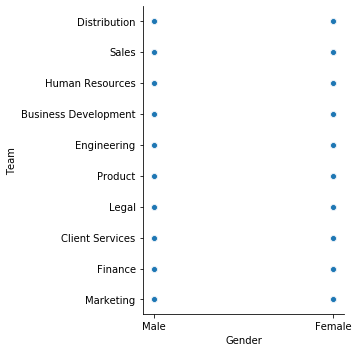

In [67]:
# Plot the graph for Gender on x axis and Team on y axis
sns.relplot(x="Gender", y="Team",data=df)

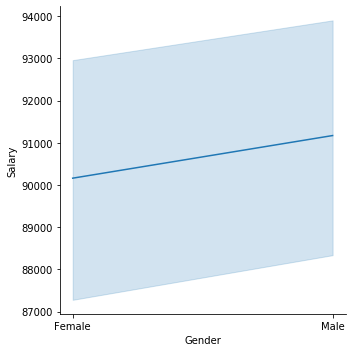

In [74]:
# Plot the graph for Gender on x axis and Salary on y axis
sns.relplot(x="Gender", y="Salary",data=df,kind='line')

In [22]:
df[(df['Senior Management']==True)&(df['Gender']=='Female')]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,Finance
11,Julie,Female,10/26/1997,3:19 PM,102508,12.637,True,Legal
...,...,...,...,...,...,...,...,...
982,Rose,Female,4/6/1982,10:43 AM,91411,8.639,True,Human Resources
987,Gloria,Female,12/8/2014,5:08 AM,136709,10.331,True,Finance
990,Robin,Female,7/24/1987,1:35 PM,100765,10.982,True,Client Services
991,Rose,Female,8/25/2002,5:12 AM,134505,11.051,True,Marketing


In [48]:
#Machine learning
#1. Create a train test split for salary and bonus
X = df.iloc[:,4].values
y = df.iloc[:,5].values

In [49]:
X_train, X_test, y_train, y_test = tts(X.reshape(-1,1), y.reshape(-1,1), random_state=0, test_size=1/3)
regr = LinearRegression()

In [50]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred = regr.predict(X_test)

Text(0.5, 1.0, 'training set')

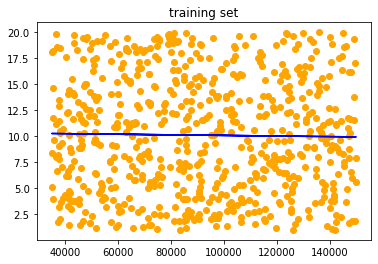

In [52]:
plt.scatter(X_train, y_train, color='orange')
plt.plot(X_train, regr.predict(X_train), color='blue')
plt.title('training set')

Text(0.5, 1.0, 'training set')

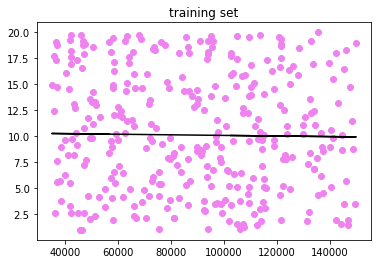

In [53]:
plt.scatter(X_test, y_test, color='violet')
plt.plot(X_test, regr.predict(X_test), color='black')
plt.title('training set')

In [38]:
from sklearn.metrics import r2_score

In [39]:

r2_score(y_pred, y_test)

-3813.666392352859

In [40]:
regr.intercept_

array([10.34702174])

In [41]:
regr.coef_

array([[-2.83612017e-06]])

In [42]:
#Predict the bonus for a given salary
regr.predict([[56.0]])

array([[10.34686291]])

In [43]:
from sklearn.metrics import mean_squared_error as mse

In [44]:
rmse = np.sqrt(mse(y_pred, y_test))
rmse

5.608368344784539